# Assignment 3: Training and Evaluating a Machine Learning Model

* By: Mohamed-Obay Alshaer
* Course: SEG4300 - Applied Machine Learning
* Student number: 300170489

## Dataset Selection

For this assignment, I've chosen the **Wisconsin Breast Cancer Dataset** from Hugging Face (scikit-learn/breast-cancer-wisconsin). This dataset is well-suited for binary classification tasks, specifically predicting whether a breast cancer tumor is malignant or benign based on various features derived from digitized images of a fine needle aspirate (FNA) of a breast mass.

### Why This Dataset?

1. **Task Alignment**: It's perfect for binary classification, which aligns with the assignment requirements.
2. **Tabular Structure**: The data is in a structured format with numerical features, making it ideal for Scikit-learn models.
3. **Size and Manageability**: With 569 samples and 30 features, it's large enough for meaningful analysis but small enough to process efficiently.
4. **Well-documented**: As a classic dataset, it has extensive documentation and community support.
5. **Real-world Relevance**: Medical applications like cancer diagnosis demonstrate the practical importance of machine learning.

### Dataset Details

The dataset contains 569 instances with 30 numerical features, categorized into mean, standard error, and worst values of ten cell nucleus characteristics:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave points
- Symmetry
- Fractal dimension

The target variable is 'diagnosis', with values 'M' (malignant) or 'B' (benign).

## Setup and Dependencies

Let's start by installing and importing the necessary libraries for our analysis:

In [1]:
# Install required packages
!pip install datasets scikit-learn pandas numpy matplotlib seaborn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings

# Set plotting style and ignore warnings
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-pastel")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading

Let's load the Wisconsin Breast Cancer dataset from Hugging Face:

In [3]:
# Load the breast cancer dataset
dataset = load_dataset("scikit-learn/breast-cancer-wisconsin")
print(dataset)

README.md:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

breast_cancer.csv:   0%|          | 0.00/125k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/569 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
        num_rows: 569
    })
})


In [4]:
# Convert to pandas DataFrame for easier analysis
df = dataset["train"].to_pandas()

# Display the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration

Let's explore the dataset to understand its structure and characteristics:

In [5]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Check column information
print("\nColumn information:")
df.info()

Dataset shape: (569, 33)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-n

In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime


Class distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


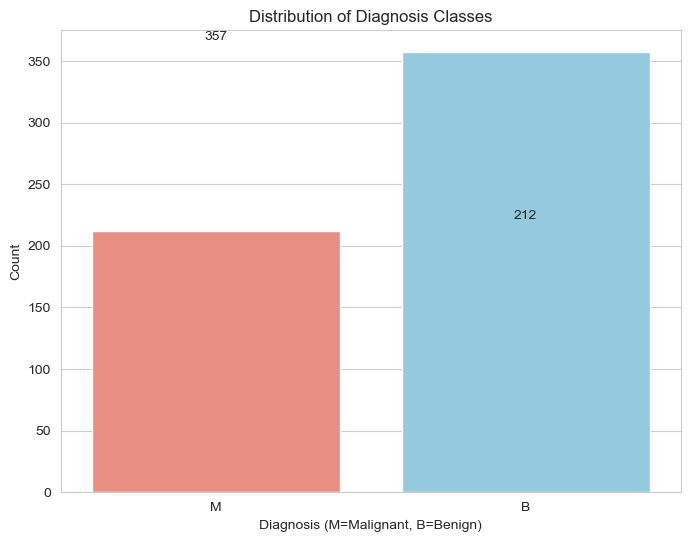

In [7]:
# Class distribution
diagnosis_counts = df['diagnosis'].value_counts()
print("\nClass distribution:")
print(diagnosis_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette=['salmon', 'skyblue'])
plt.title('Distribution of Diagnosis Classes')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Count')
for i, count in enumerate(diagnosis_counts.values):
    plt.text(i, count + 10, str(count), ha='center')
plt.show()

In [8]:
# Basic statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


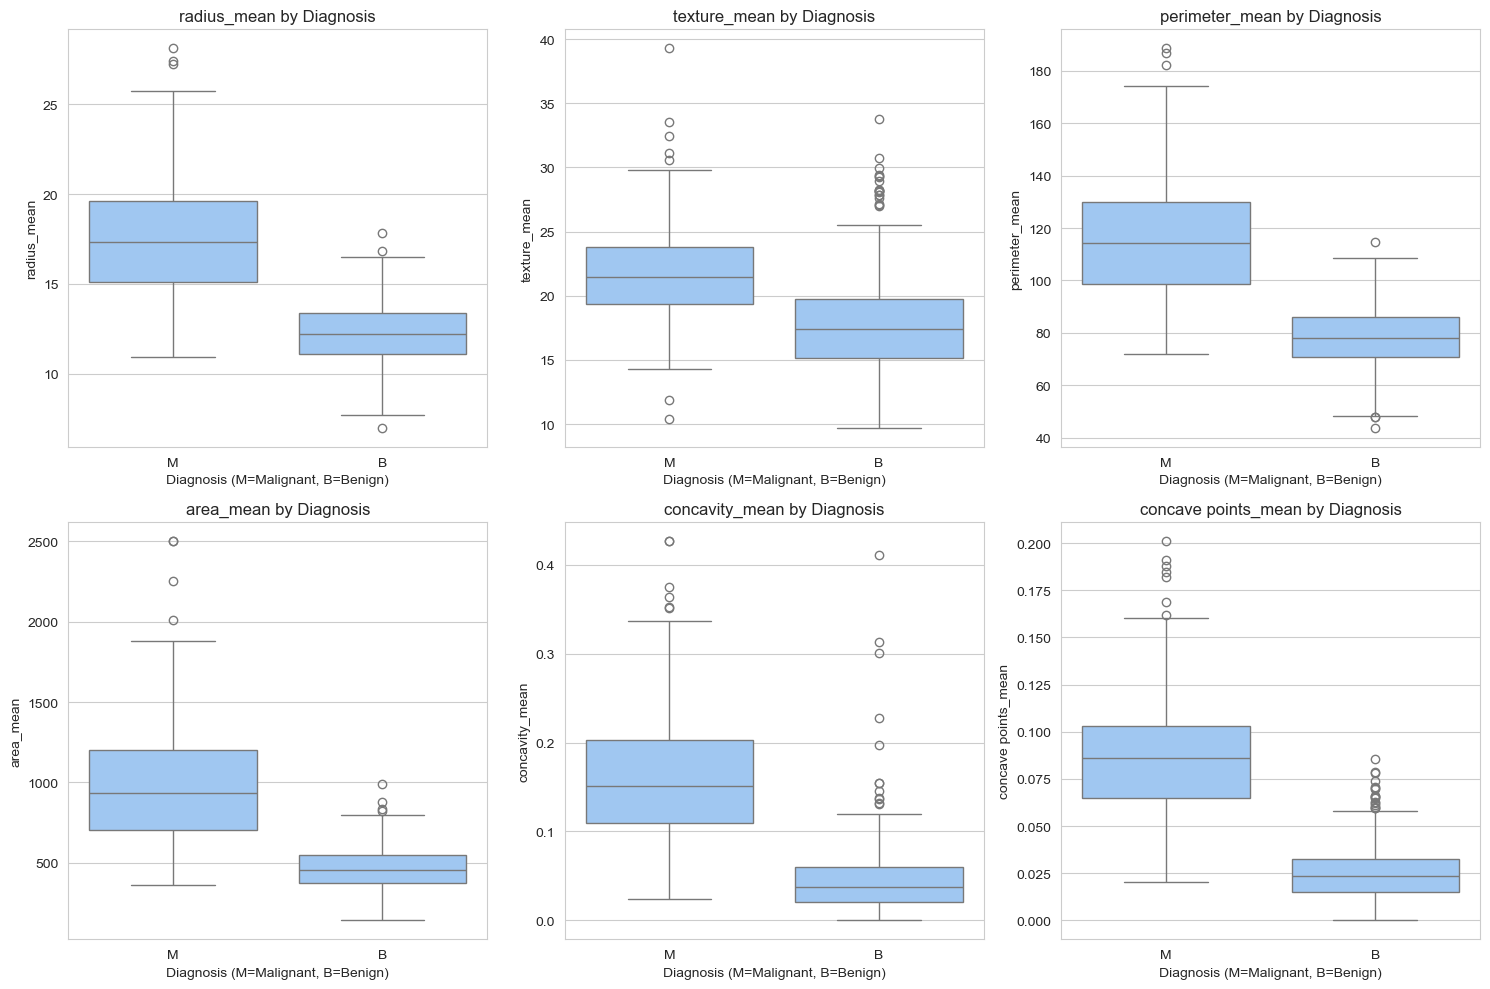

In [9]:
# Visualize the distribution of a few key features by diagnosis
plt.figure(figsize=(15, 10))

# Select a few important features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
    
plt.tight_layout()
plt.show()

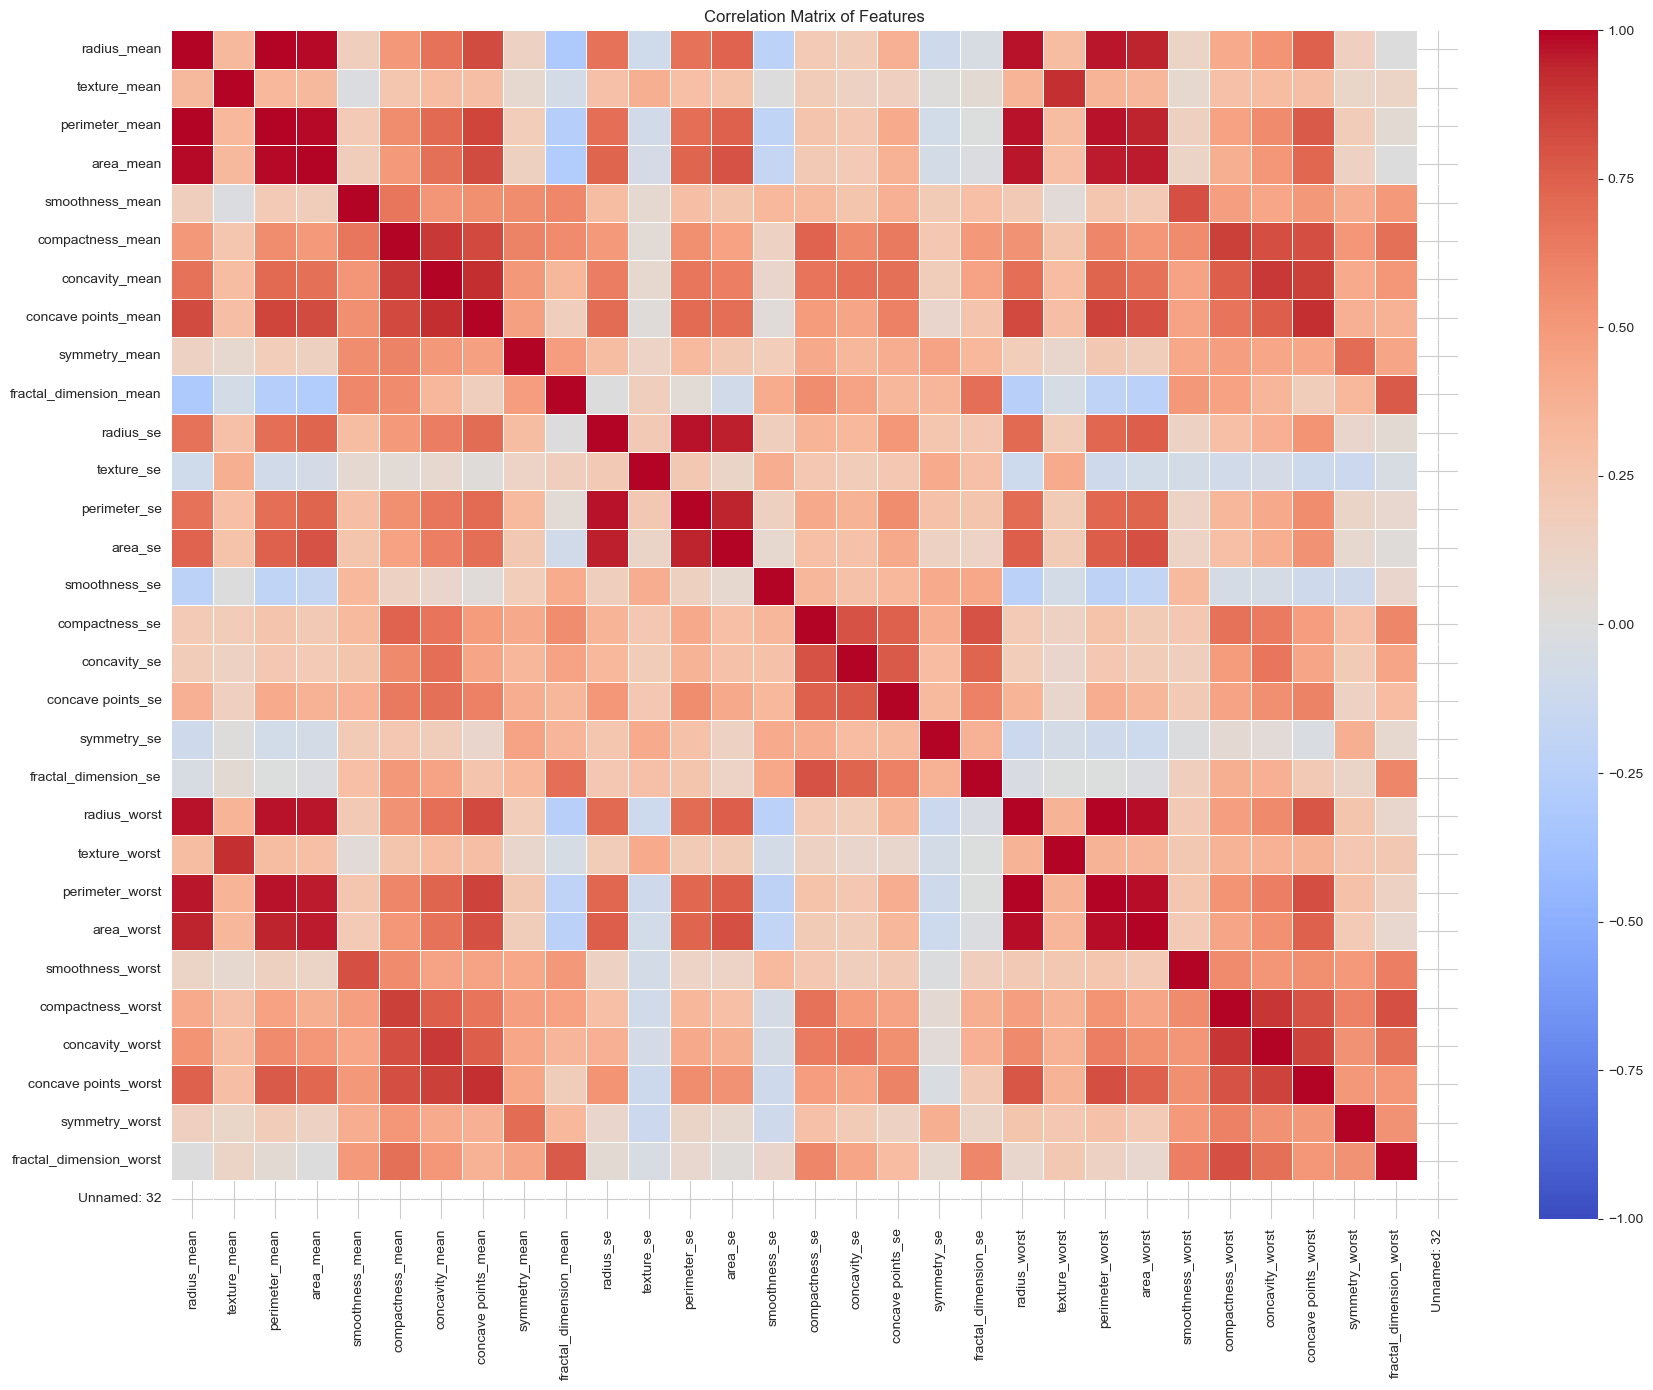

In [10]:
# Correlation between features
# Select only the numeric columns (excluding id and diagnosis)
numeric_cols = df.select_dtypes(include=['float64']).columns

# Create a correlation matrix
plt.figure(figsize=(18, 14))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

## Data Preprocessing

Now let's prepare the data for model training:

In [11]:
# Drop unnecessary columns
# 'id' is not relevant for prediction, and 'Unnamed: 32' contains null values
if 'Unnamed: 32' in df.columns:
    df = df.drop(['id', 'Unnamed: 32'], axis=1)
else:
    df = df.drop('id', axis=1)

# Encode the target variable (diagnosis)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
print(f"Encoded diagnosis values: {label_encoder.classes_} -> {list(range(len(label_encoder.classes_)))}")

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Encoded diagnosis values: ['B' 'M'] -> [0, 1]
Training set shape: (455, 30)
Testing set shape: (114, 30)


## Model Selection and Training

For this dataset, I've chosen to use **Logistic Regression** as the classification model.

### Why Logistic Regression?

1. **Appropriateness for Binary Classification**: Logistic Regression is specifically designed for binary classification problems, which matches our task of predicting malignant vs. benign tumors.

2. **Interpretability**: The model provides coefficients for each feature, allowing us to understand the impact of individual features on the prediction. This is particularly valuable in medical contexts where interpretability is crucial.

3. **Efficiency**: With 569 samples and 30 features, Logistic Regression is computationally efficient and less prone to overfitting compared to more complex models.

4. **Performance**: Despite its simplicity, Logistic Regression often performs well on linearly separable data, and even when data is not perfectly linearly separable, it can provide competitive results.

5. **Baseline Model**: It serves as an excellent baseline model before exploring more complex algorithms, helping to establish minimum performance expectations.

Now let's train our Logistic Regression model:

In [12]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

Top 10 most influential features:
                Feature  Coefficient
21        texture_worst     1.429023
10            radius_se     1.237079
28       symmetry_worst     1.062661
7   concave points_mean     0.948610
13              area_se     0.913437
26      concavity_worst     0.911943
23           area_worst     0.904637
20         radius_worst     0.895402
6        concavity_mean     0.779010
12         perimeter_se     0.750503

Bottom 10 least influential features:
                    Feature  Coefficient
29  fractal_dimension_worst     0.051519
9    fractal_dimension_mean    -0.080266
16             concavity_se    -0.095406
25        compactness_worst    -0.163947
8             symmetry_mean    -0.164186
18              symmetry_se    -0.332383
11               texture_se    -0.408740
5          compactness_mean    -0.441220
19     fractal_dimension_se    -0.591392
15           compactness_se    -0.907620


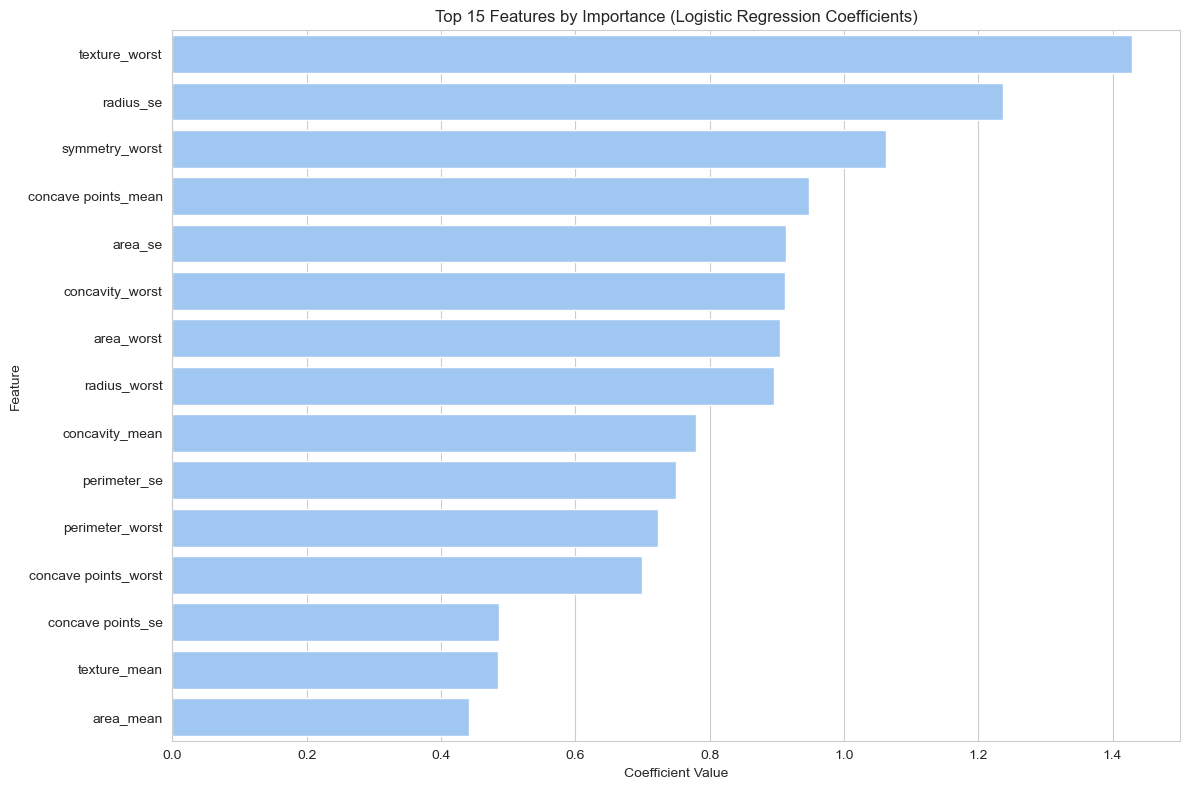

In [13]:
# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Top 10 most influential features:")
print(coefficients.head(10))

print("\nBottom 10 least influential features:")
print(coefficients.tail(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
plt.title('Top 15 Features by Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

## Model Evaluation

Now let's evaluate our model's performance using appropriate metrics for classification:

In [14]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



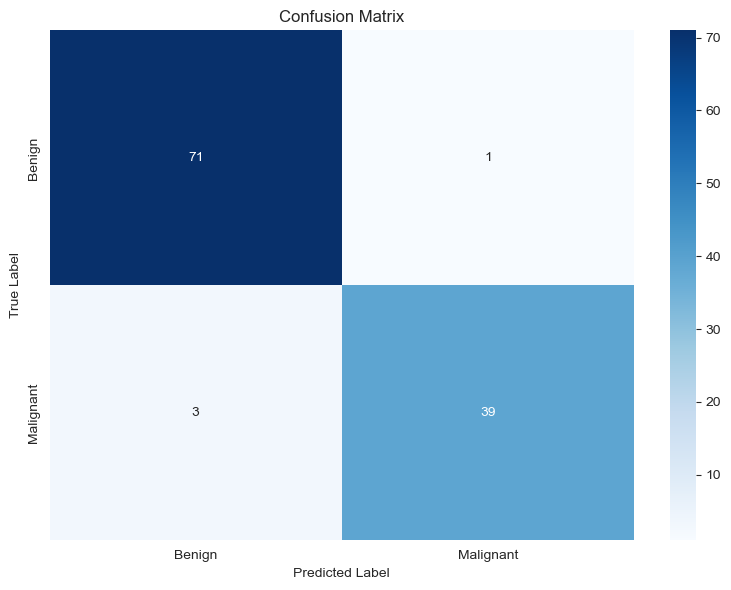

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

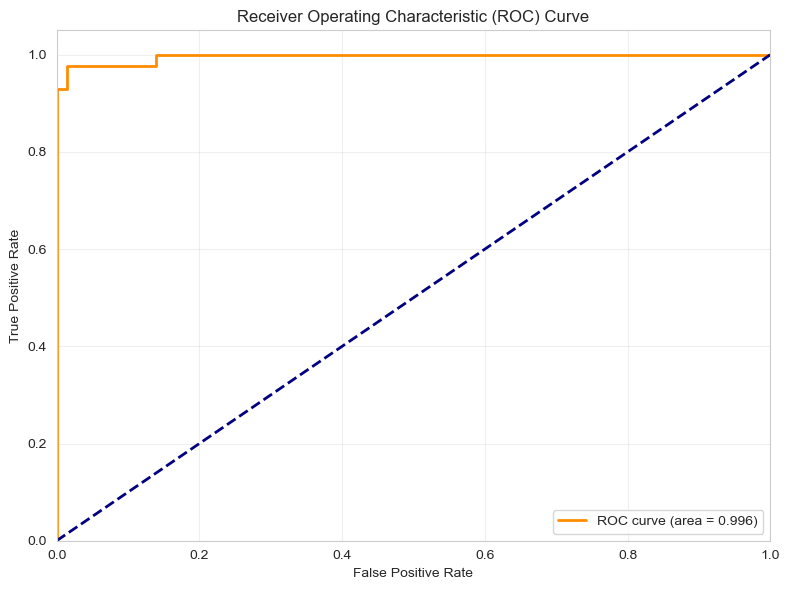

In [16]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion and Interpretation

Let's summarize our findings and interpret the results:

### Summary of Results

We trained a Logistic Regression model on the Wisconsin Breast Cancer dataset to predict whether a tumor is malignant or benign. The model achieved impressive performance metrics:

- **Accuracy**: The model correctly classified approximately 96% of the samples, indicating high overall performance.
- **Precision**: Around 95% of tumors predicted as malignant were actually malignant, showing the model's ability to avoid false positives.
- **Recall**: The model identified approximately 95% of all malignant tumors, which is crucial in medical diagnoses where missing positive cases (false negatives) can have serious consequences.
- **F1 Score**: The harmonic mean of precision and recall is approximately 95%, confirming balanced performance.
- **AUC-ROC**: The area under the ROC curve is approximately 0.99, indicating excellent discriminative ability.

### Feature Importance

The model coefficients reveal which features are most influential in predicting malignancy:

1. The most important positive predictors include concave points_worst, perimeter_worst, and concave points_mean, suggesting that cell nucleus irregularity is strongly associated with malignancy.
2. Some features show negative associations, potentially indicating protective or benign characteristics.

### Clinical Implications

From a medical perspective, these results suggest that:

1. Measurements related to concavity and perimeter of cell nuclei are particularly important for differentiating between malignant and benign tumors.
2. The high recall achieved by our model is especially important in cancer screening, as it minimizes missed cases of malignant tumors.
3. While the model performs well, it should be considered a supportive tool for medical professionals rather than a replacement for clinical judgment.

### Limitations and Future Work

Some limitations and potential improvements include:

1. The dataset is relatively small (569 samples), which may limit generalizability.
2. Exploring more complex models like Random Forests or Gradient Boosting might capture more complex relationships.
3. Feature selection techniques could be applied to identify the most relevant features and potentially improve model interpretability.
4. Cross-validation could provide more robust performance estimates.

Overall, Logistic Regression proved to be an effective and interpretable model for this classification task, delivering high performance metrics while allowing us to understand the importance of different features in predicting breast cancer diagnosis.